In [1]:
from sklearn.isotonic import IsotonicRegression
import pandas as pd
import matplotlib.pyplot as plt


plt.style.use("ggplot")

df = pd.read_csv("processed/2.csv")
df.head()

,review_time,card_id,rating,review_state,is_learn_start,sequence_group,last_learn_start,mask,delta_t,i,delta_t_f,t_bin,t_history,r_history,t_f_history,y
0,1658184894444,1230430486697,3,0,True,1,1,True,0,1,0.00s,1.00,NaN,NaN,NaN,1
1,1658248040951,1230430486697,3,0,False,1,1,True,63146,2,17.54h,47434.81,0,3,0.00s,1
2,1659287345928,1230430486697,3,1,False,1,1,True,1039304,3,12.03d,980052.78,"0,63146","3,3","0.00s,17.54h",1
3,1664304919242,1230430486697,3,1,False,1,1,True,5017573,4,58.07d,3764970.74,"0,63146,1039304","3,3,3","0.00s,17.54h,12.03d",1
4,1657068143827,1230430623643,3,0,True,2,2,True,0,1,0.00s,1.00,NaN,NaN,NaN,1


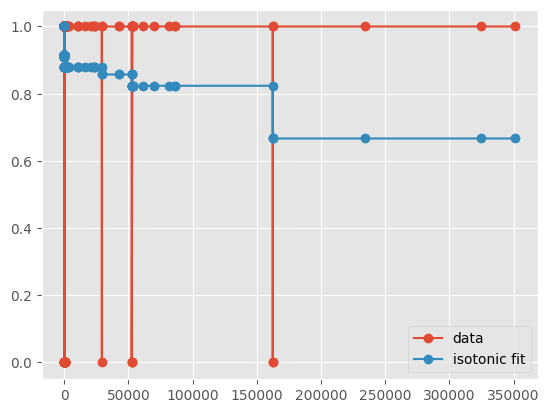

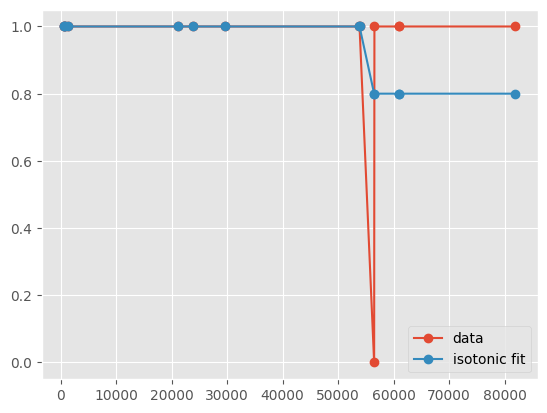

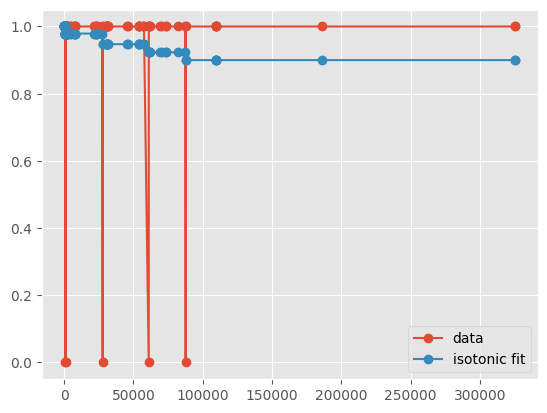

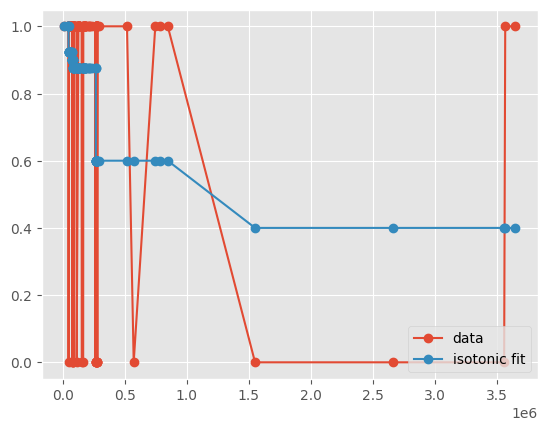

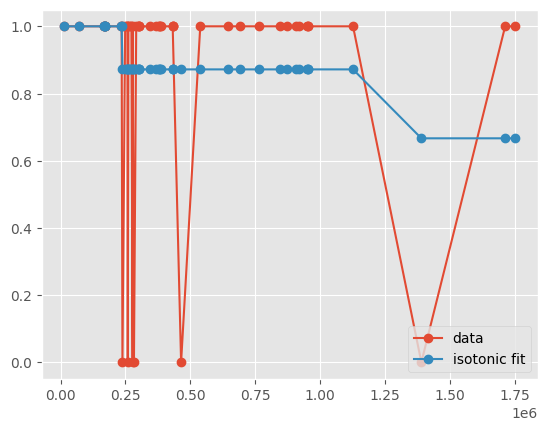

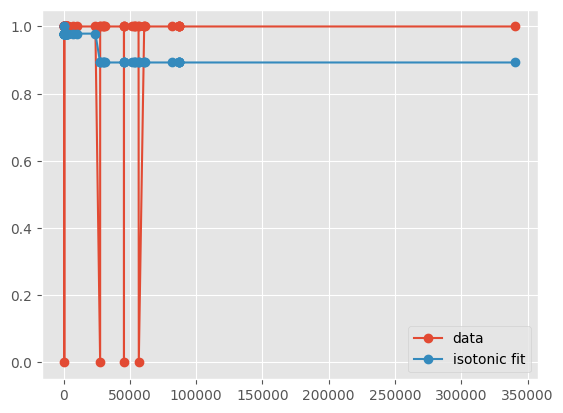

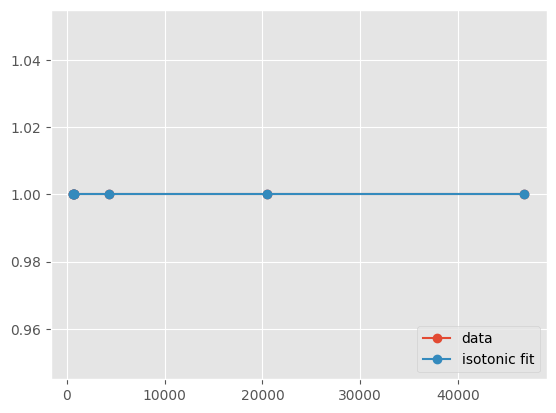

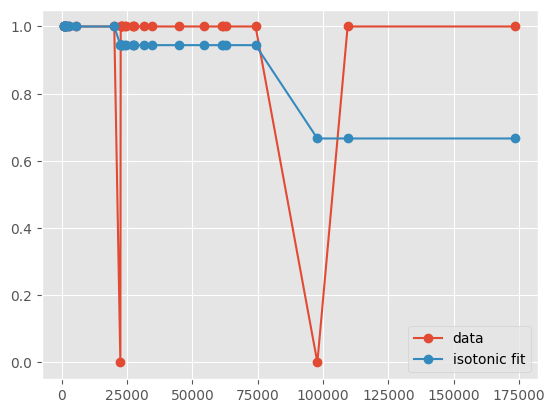

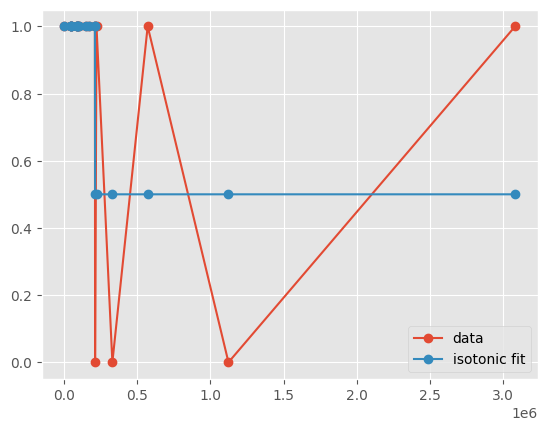

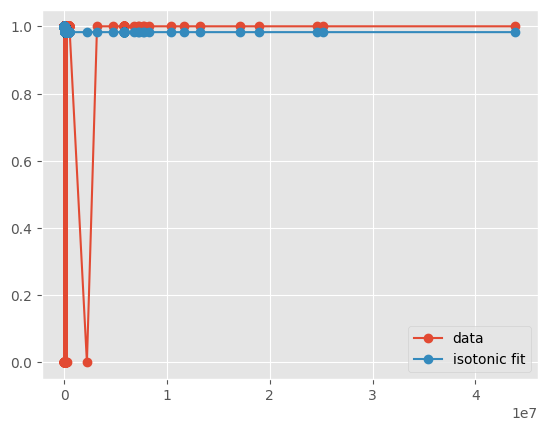

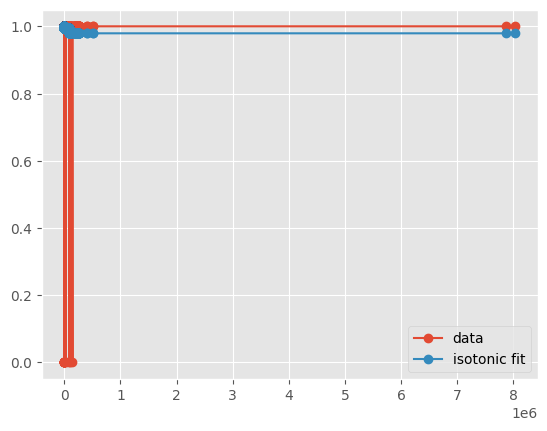

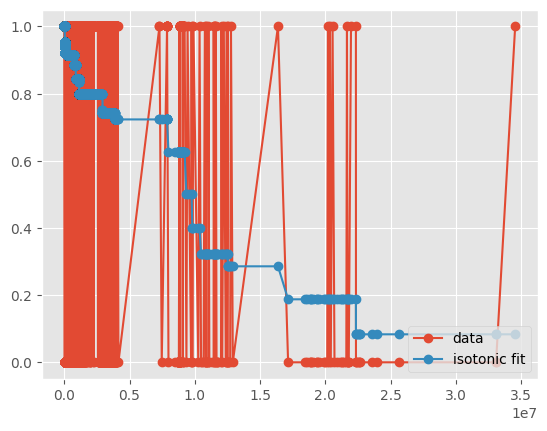

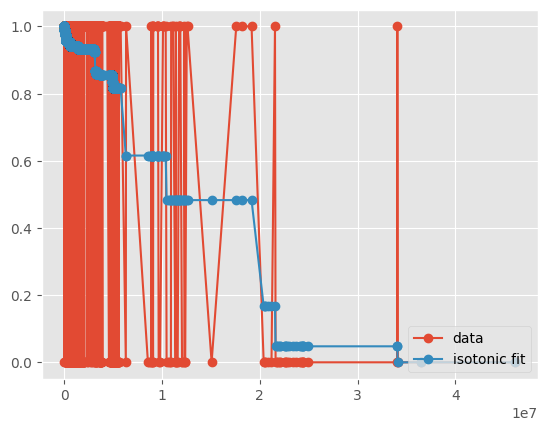

In [2]:
for r_history in (
    "1",
    "1,2",
    "1,3",
    "1,3,3",
    "1,3,3,3",
    "2",
    "2,2",
    "2,3",
    "2,3,3",
    "3",
    "3,2",
    "3,3",
    "3,3,3",
):

    x, y = df[df['r_history'] == r_history][['delta_t', 'y']].sort_values(by='delta_t').values.T

    # print(y)

    ir = IsotonicRegression(increasing=False)
    ir.fit(x, y)

    y_pred = ir.predict(x)

    # print(y_pred)

    plt.plot(x, y, 'o-', label='data')
    plt.plot(x, y_pred, 'o-', label='isotonic fit')
    plt.legend(loc='lower right')
    plt.show()
